<a href="https://colab.research.google.com/github/surajkumar96/Machine-Learning/blob/master/Linear_regression_Practice_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Linear Reggresion Guide Reference](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
Uploaded=files.upload()

Saving Summary of Weather.csv to Summary of Weather.csv


In [7]:
import io

weather_Dataset=pd.read_csv(io.BytesIO(Uploaded['Summary of Weather.csv']))
weather_Dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
weather_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     119040 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

# **Data Cleaning**
Data Cleaning means the process of identifying the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and then modifying, replacing or deleting them according to the necessity. Data cleaning is considered a foundational element of the basic data science.

**Missing data:**

It is rare to have a real world dataset without having any missing values. When you start to work with real world data, you will find that most of the dataset contains missing values. Handling missing values is very important because if you leave the missing values as it is, it may affect your analysis and machine learning models. So, you need to be sure that whether your dataset contains missing values or not. If you find missing values in your dataset you must handle it. If you find any missing values in the dataset you can perform any of these three task on it:
1. Leave as it is
2. Filling the missing values
3. Drop them

In [42]:
df_Datacleaning=pd.DataFrame(weather_Dataset)
df_Datacleaning.isna().sum() / df_Datacleaning.shape[0]
df_Datacleaning.isnull().sum()/df_Datacleaning.shape[0]


STA            0.000000
Date           0.000000
Precip         0.000000
WindGustSpd    0.000000
MaxTemp        0.000000
MinTemp        0.000000
MeanTemp       0.000000
Snowfall       0.000000
PoorWeather    0.712391
YR             0.000000
MO             0.000000
DA             0.000000
PRCP           0.016230
DR             0.995523
SPD            0.995531
MAX            0.003982
MIN            0.003931
MEA            0.004183
SNF            0.009770
SND            0.953268
FT             1.000000
FB             1.000000
FTI            1.000000
ITH            1.000000
PGT            0.995590
TSHDSBRSGF     0.712391
SD3            1.000000
RHX            1.000000
RHN            1.000000
RVG            1.000000
WTE            1.000000
dtype: float64

In [43]:
df_Datacleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  119040 non-null  float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     119040 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [60]:
import math
df_Datacleaning['Snowfall'].fillna(str(df_Datacleaning['Snowfall'].mode()),inplace=True)
df_Datacleaning['PoorWeather'].fillna(str(df_Datacleaning['PoorWeather'].mode()),inplace=True)
df_Datacleaning['PRCP'].fillna(str(df_Datacleaning['PRCP'].mode()),inplace=True)
df_Datacleaning['SNF'].fillna(str(df_Datacleaning['SNF'].mode()),inplace=True)
df_Datacleaning['TSHDSBRSGF'].fillna(str(df_Datacleaning['TSHDSBRSGF'].mode()),inplace=True)
df_Datacleaning['WindGustSpd'].fillna(df_Datacleaning['WindGustSpd'].mean(),inplace=True)
df_Datacleaning['DR'].fillna(df_Datacleaning['DR'].mean(),inplace=True)
df_Datacleaning['SPD'].fillna(df_Datacleaning['SPD'].mean(),inplace=True)
df_Datacleaning['MAX'].fillna(df_Datacleaning['MAX'].mean(),inplace=True)
df_Datacleaning['MIN'].fillna(df_Datacleaning['MIN'].mean(),inplace=True)
df_Datacleaning['MEA'].fillna(df_Datacleaning['MEA'].mean(),inplace=True)
df_Datacleaning['SND'].fillna(df_Datacleaning['SND'].mean(),inplace=True)

df_Datacleaning.drop(["FB","FTI","ITH","PGT","SD3","RHX","RHN","RVG","WTE"],inplace=True, axis=1)


df_Datacleaning.isna().sum() / df_Datacleaning.shape[0]

STA            0.0
Date           0.0
Precip         0.0
WindGustSpd    0.0
MaxTemp        0.0
MinTemp        0.0
MeanTemp       0.0
Snowfall       0.0
PoorWeather    0.0
YR             0.0
MO             0.0
DA             0.0
PRCP           0.0
DR             0.0
SPD            0.0
MAX            0.0
MIN            0.0
MEA            0.0
SNF            0.0
SND            0.0
TSHDSBRSGF     0.0
dtype: float64

In [64]:
df_Datacleaning.shape

(119040, 21)

In [62]:
weather_Dataset.shape

(119040, 31)

In [65]:
df_Datacleaning.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0
std,20953.209402,0.687777,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,1.017596,0.371370,14.839727,14.453003,14.181324,0.0
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0
25%,11801.000000,37.774534,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,26.998124,20.396617,78.000000,59.000000,69.000000,0.0
50%,22508.000000,37.774534,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,26.998124,20.396617,85.000000,70.000000,78.000000,0.0
75%,33501.000000,37.774534,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,26.998124,20.396617,89.000000,74.000000,81.000000,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0


In [66]:
print(weather_Dataset.keys())
print(df_Datacleaning.keys())

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')
Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'TSHDSBRSGF'],
      dtype='object')


In [0]:
df_Weather=df_Datacleaning

In [69]:
df_Weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,TSHDSBRSGF
0,10001,1942-7-1,1.016,37.774534,25.555556,22.222222,23.888889,0,0 1\ndtype: object,42,7,1,0.04,26.998124,20.396617,78.0,72.0,75.0,0,0.0,0 1\ndtype: object
1,10001,1942-7-2,0,37.774534,28.888889,21.666667,25.555556,0,0 1\ndtype: object,42,7,2,0,26.998124,20.396617,84.0,71.0,78.0,0,0.0,0 1\ndtype: object
2,10001,1942-7-3,2.54,37.774534,26.111111,22.222222,24.444444,0,0 1\ndtype: object,42,7,3,0.1,26.998124,20.396617,79.0,72.0,76.0,0,0.0,0 1\ndtype: object
3,10001,1942-7-4,2.54,37.774534,26.666667,22.222222,24.444444,0,0 1\ndtype: object,42,7,4,0.1,26.998124,20.396617,80.0,72.0,76.0,0,0.0,0 1\ndtype: object
4,10001,1942-7-5,0,37.774534,26.666667,21.666667,24.444444,0,0 1\ndtype: object,42,7,5,0,26.998124,20.396617,80.0,71.0,76.0,0,0.0,0 1\ndtype: object


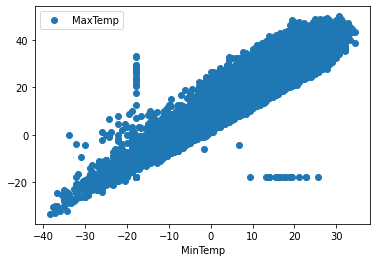

In [70]:
df_Weather.plot(x='MinTemp',y='MaxTemp',style='o')

# **Correlation**
Variables within a dataset can be related for lots of reasons.

For example:

    One variable could cause or depend on the values of another variable.
    One variable could be lightly associated with another variable.
    Two variables could depend on a third unknown variable.

It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

    Positive Correlation: both variables change in the same direction.
    Neutral Correlation: No relationship in the change of the variables.
    Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.



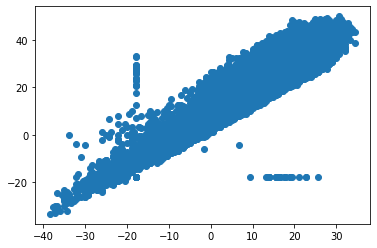

In [71]:
from matplotlib import pyplot
x=df_Weather['MinTemp']
y=df_Weather['MaxTemp']
pyplot.scatter(x, y)
pyplot.show()



In [22]:
"""A scatter plot of the two variables is created. Because we contrived the dataset, we know there is a relationship between the two variables.
This is clear when we review the generated scatter plot where we can see an increasing trend.
Before we look at calculating some correlation scores, we must first look at an important statistical building block, called covariance."""

'A scatter plot of the two variables is created. Because we contrived the dataset, we know there is a relationship between the two variables.\nThis is clear when we review the generated scatter plot where we can see an increasing trend.\nBefore we look at calculating some correlation scores, we must first look at an important statistical building block, called covariance.'

# **Covariance**
Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.
The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables; in this case, the remaining two values are the same given that we are calculating the covariance for only two variables.
The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.

Running the example calculates and prints the covariance matrix.

Because the dataset was contrived with each variable drawn from a Gaussian distribution and the variables linearly correlated, covariance is a reasonable method for describing the relationship.

The covariance between the two variables is 63.822. We can see that it is positive, suggesting the variables change in the same direction as we expect.


In [23]:
from numpy import cov
covariance=cov(x,y)
print(covariance)

[[69.46508792 63.82273271]
 [63.82273271 76.00032712]]


In [0]:
"""A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next."""

# **Pearson’s Correlation**
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.
We can see that the two variables are positively correlated and that the correlation is 0.8. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

In [27]:
from scipy.stats import pearsonr
corr=pearsonr(x,y)
print("Pearson coeficient: %.3f",corr)

Pearson coeficient: %.3f (0.8783839059497562, 0.0)


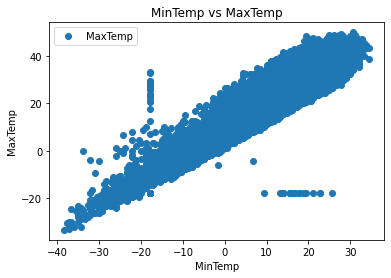

In [73]:
df_Weather.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

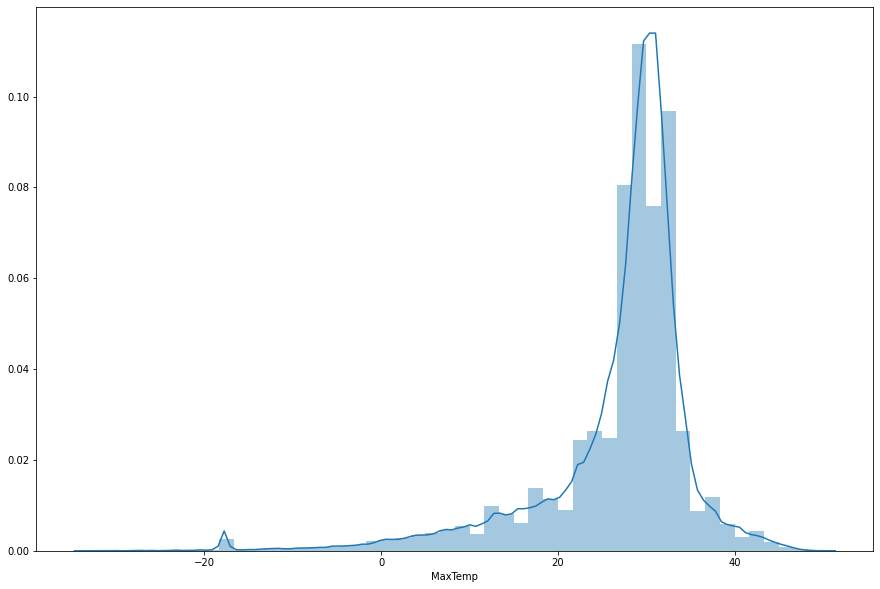

In [74]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(df_Weather['MaxTemp'])

Next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [0]:
X=df_Weather['MinTemp'].values.reshape(-1,1)
y=df_Weather['MaxTemp'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [77]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear Regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [78]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[10.66185201]
[[0.92033997]]


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [0]:
y_pred=model.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [80]:
df_Result= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_Result

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


We can also visualize comparison result as a bar graph using the below script :

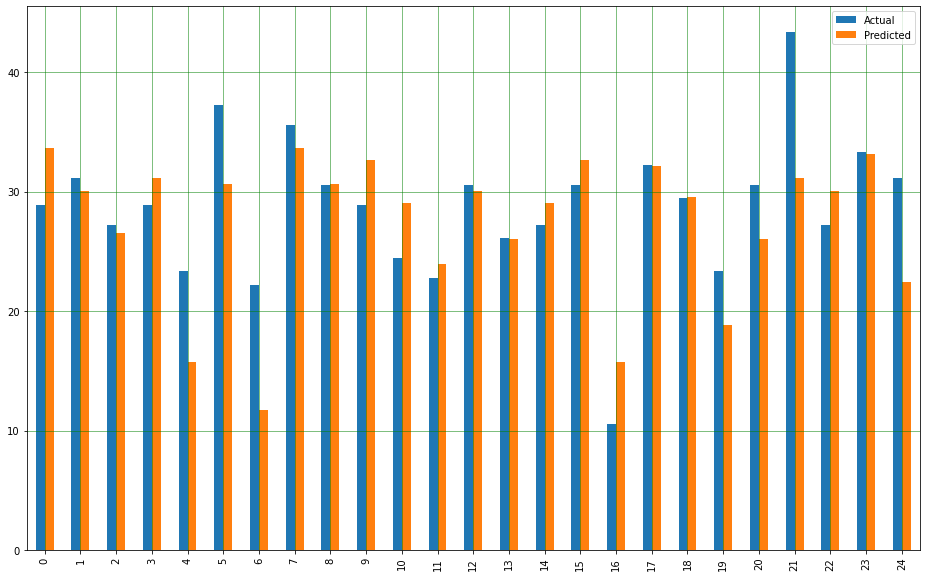

In [81]:
df_bar=df_Result.head(25)
df_bar.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

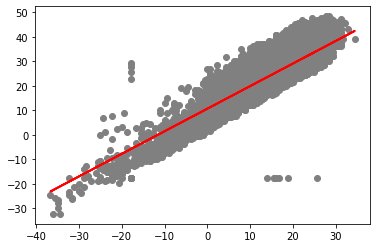

In [82]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors

**Mean Squared Error (MSE)** is the mean of the squared errors

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.
